## Изучение закономерностей определяющих успешность компьютерных игр.

Отдел продаж магазина компьютерных игр просит дать рекомендации по распределению маркетингового бюджета, опираясь на даннные о продажах игр за предыдущие годы. В нашем распоряжении данные о продажах игр за несколько лет на территории Северной Америки, Европы и Японии.

- Подготовка данных - в этой части проекта мы подготовим таблицу к анализу - избавимся от пропусков в данных, приведем данные к удобным типам.
- Проведение исследовательского анализа данных - определим актуальный временной период для анализа, лидирующие в этом периоде платформы и изучим их поведение во времени. Посмотрим, есть ли зависимость между отзывами и продажами. Построим распределение продаж по жанрам.
- Анализ поведения пользователей по регионам - изучение типичного поведения пользователей в зависимости от региона, предпочитаемые платформы, жанры и возрастные игровые рейтинги
- Проверка гипотез - в завершение проекта проверим две гипотезы о равенстве средних пользовательских оценок в зависимости от платформ и жанров на примере конкретных платформ и жанров

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

data = pd.read_csv('C:\yandex_pract\games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


мы имеем более 16тыс записей, есть небольшие недочеты в первых четырех столбцах, вероятно придется удалить некоторые записи. В последних трех столбцах более серьезные проблемы, столбцы заполнены менее, чем на 60% - оценки критиков отсутствуют более чем в половине записей, в оценках пользователей тип данных указывает на возможные ошибки.

# Подготовка данных

Приведем названия столбцов в надлежащий вид

In [3]:
data.columns = data.columns.str.lower()

посмотрим уникальные значения в платформах, годах выхода, жанрах, рейтинге

In [4]:
print(data['platform'].unique())
print(data['year_of_release'].unique())
print(data['genre'].unique())
print(data['rating'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


посмотрим строки с неуказанным годом выпуска

In [5]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В названиях встречается год выпуска, его можно извлечь, вернемся к этому позже, если время будет, этих строк не так много, поэтому пока просто их удалим. Заодно удалим строки с пропусками в name, genre

In [6]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

переведем год выпуска в целый тип, а пропускам в рейтинге дадим имя NN

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['rating'] = data['rating'].fillna('NN')

In [8]:
data.groupby(['genre', 'year_of_release']).agg({'name':'count'}).reset_index().rename(columns = {'name':'Games Released'})

,genre,year_of_release,Games Released
0,Action,1980,1
1,Action,1981,25
2,Action,1982,18
3,Action,1983,7
4,Action,1984,1
...,...,...,...
382,Strategy,2012,15
383,Strategy,2013,19
384,Strategy,2014,8
385,Strategy,2015,16


Посмотрим столбец оценки критиков

In [9]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

заполним пропуски нулями (нулевую оценку никто не поставил, поэтому нули не смешаются с реальными оценками, если понадобится, отсеить их будет несложно)

In [10]:
data['critic_score'] = data['critic_score'].fillna(0)

Посмотрим столбец оценки пользователей

In [11]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

У нас большое количество строк со значением 'tbd', что означает To Be Determined (будет определено), 'tbd' заменим нулем и переведем в числовой тип. Но перед этим проверим, нет ли таких юзеров, которые оценили игру нулем.

In [12]:
print(len(data[data['user_score'] == '0']))

1


один такой пользователь нашелся, его данные смешаются с пропусками, не будем переживать за него

In [13]:
data['user_score'] = data['user_score'].replace('tbd', 0) # вместо значения "tbd" ставим ноль

data['user_score'] = data['user_score'].fillna(0) # заполняем пропуски нулями

data['user_score'] = pd.to_numeric(data['user_score']) # переводим в числовой тип

In [14]:
print(len(data[data['user_score'] == 0]))
print('реальное количество пропусков в оценках пользователей')

8982
реальное количество пропусков в оценках пользователей


In [15]:
data['user_score'].describe()

count    16444.000000
mean         3.234237
std          3.689043
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

оценки пользователей выставляются по 10-ти балльной системе, некорректных значений не наблюдается

Добавим столбец - суммарные продажи во всех регионах

In [16]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

In [17]:
print(len(data[(data['critic_score'] == 0) & (data['user_score'] == 0) & (data['rating'] == 'NN')]))
print('количество строк с пропусками двух оценок и возрастного рейтинга')

6580
количество строк с пропусками двух оценок и возрастного рейтинга


Таблица готова для анализа, удалили небольшое количество строк, отсутствующие оценки заполнили нулями. В основном оценки отсутствуют в одних и тех же строках (в этих строках и рейтинг часто отсутствует)

# Проведение исследовательского анализа данных

Посмотрим распределение выхода игр по годам

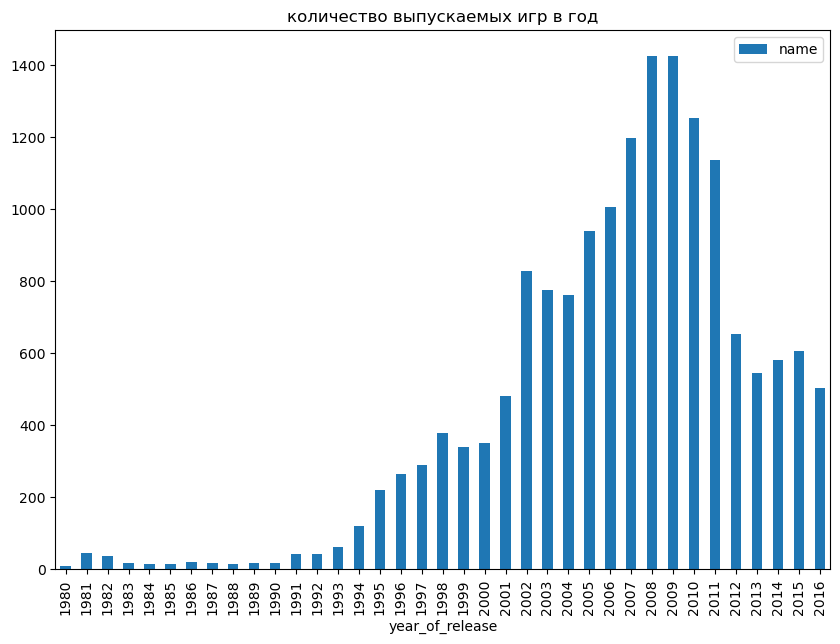

In [18]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
# display(games_per_year)
games_per_year.plot(kind='bar', figsize=(10,7))
plt.title('количество выпускаемых игр в год')
plt.show()

до 1993 года игры выпускались в небольшом количестве, c 1994 начался бурный рост, который достиг максимума в 2008-2009 годах, когда количество выпускаемых игр в год увеличилось в 35 раз, в 2012 году произошел резкий спад (примерно в два раза). С 2012 года ситуацию на рынке можно считать стабильной. Вероятно, этот период мы и будем исследовать подробнее.

Интересно, как распределились при этом продажи по годам? Посмотрим

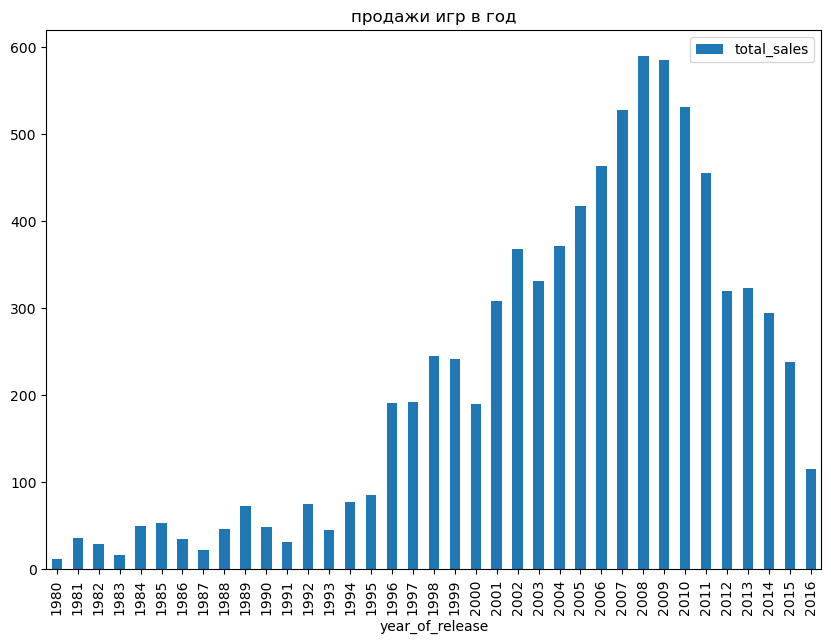

In [19]:
sales_per_year = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
sales_per_year.plot(kind='bar', figsize=(10,7))
plt.title('продажи игр в год')
plt.show()

Выпуск игр и продажи росли и падали вместе, т.е. в 2012 году произошло падение спроса, а не уменьшение ассортимента при том же спросе

Теперь построим распределение игр по платформам

In [20]:
games_by_platforms = data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)
# display(games_by_platforms)

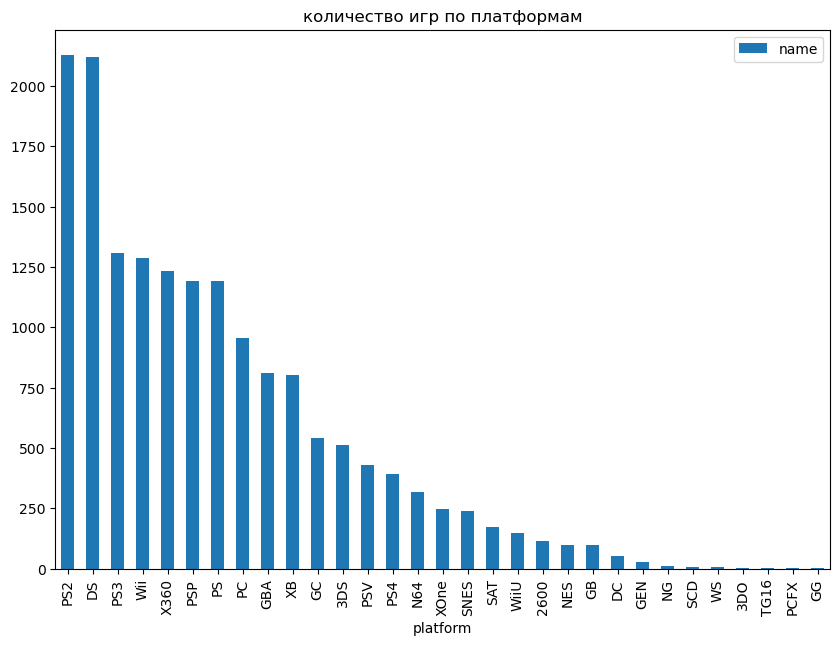

In [21]:
games_by_platforms.plot(kind='bar', figsize=(10, 7))
plt.title('количество игр по платформам')
plt.show()

На графике выделяются с большим отрывом два лидера, возьмем первые 10 платформ и изучим их жизнь во времени

In [22]:
top_ten_platforms = games_by_platforms[:10] # 10 платформ с максимальным количеством выпущенных игр

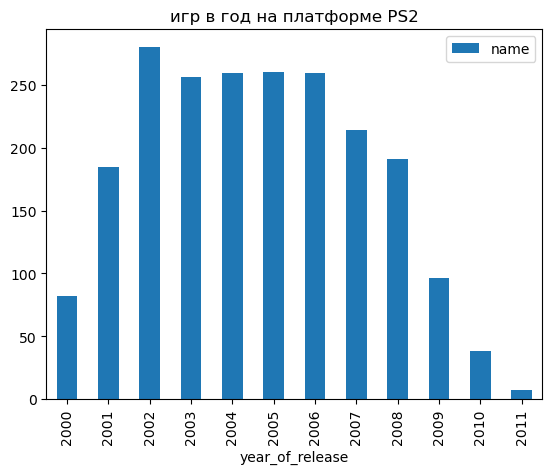

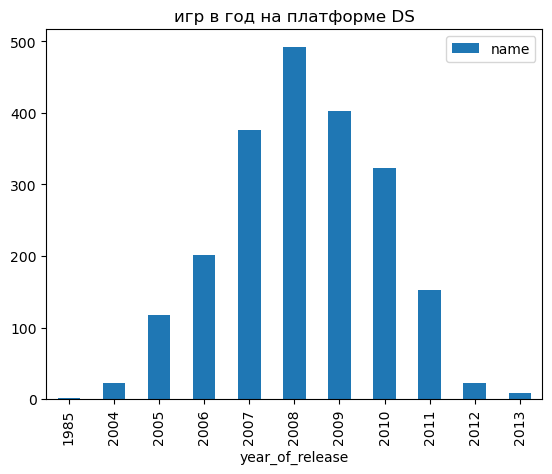

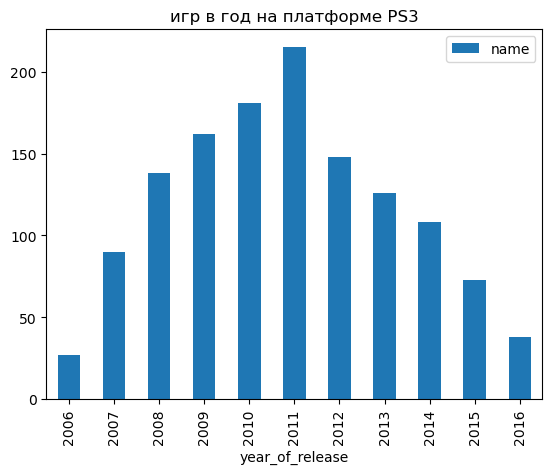

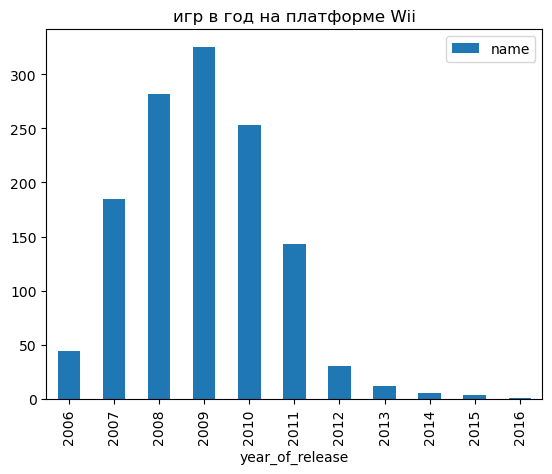

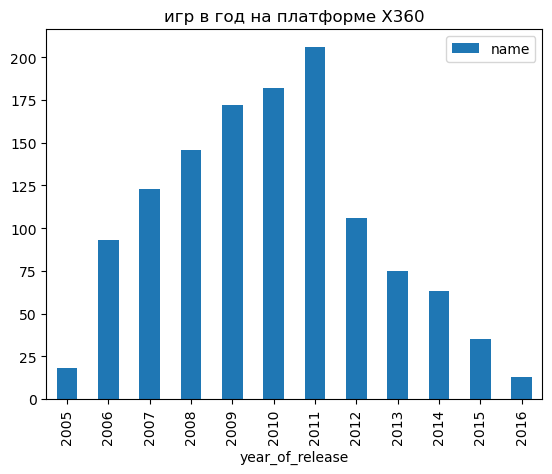

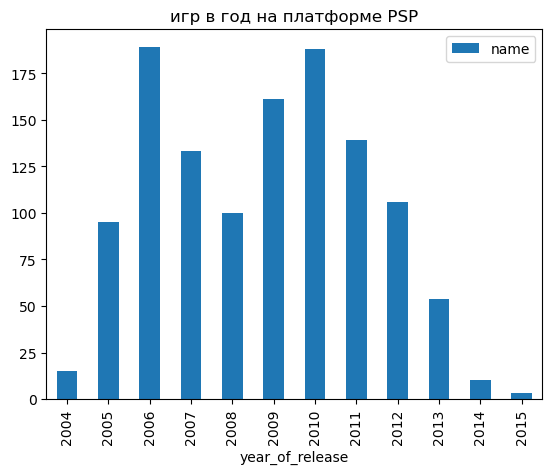

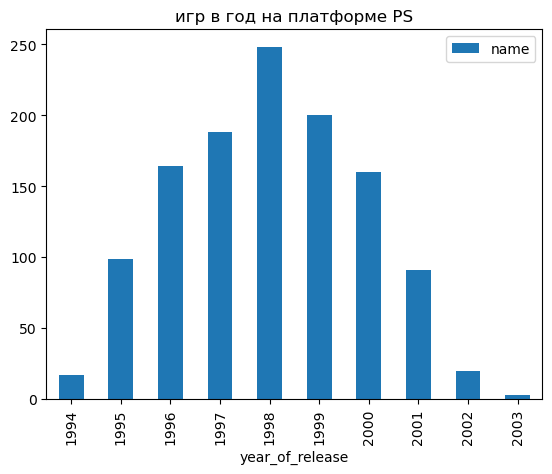

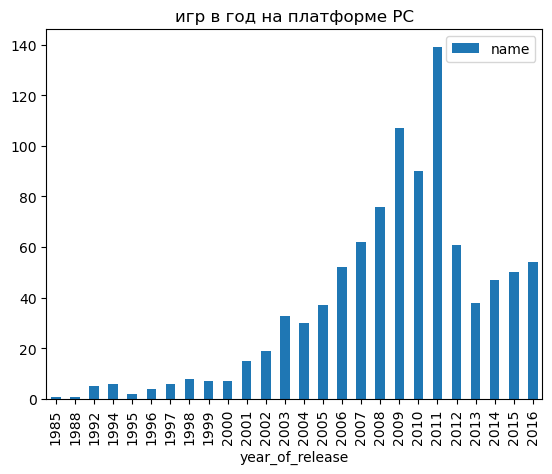

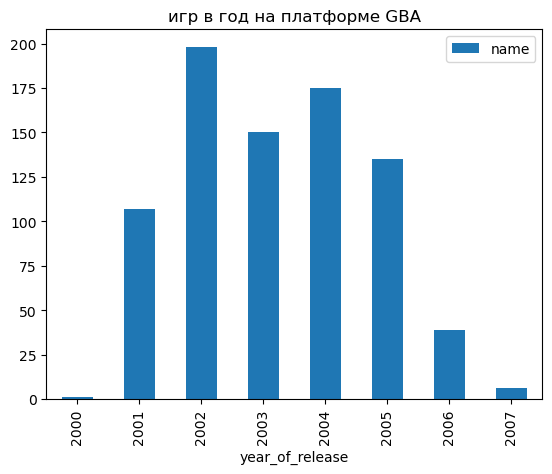

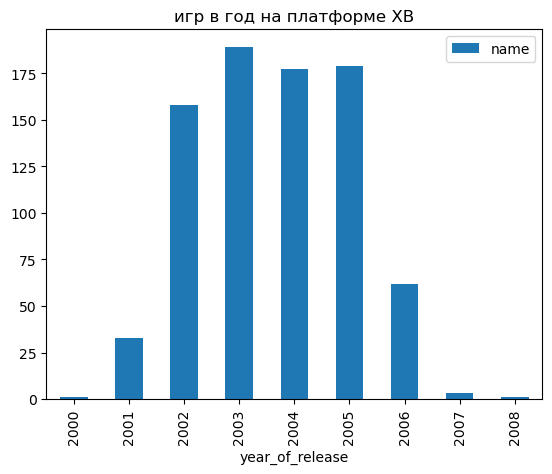

In [23]:
for platform in top_ten_platforms.index:
    games_on_platform_per_year = data[data['platform'] == platform].pivot_table(index='year_of_release', values='name', aggfunc='count')
#    display(games_on_platform_per_year)
    games_on_platform_per_year.plot(kind='bar')
    plt.title(f'игр в год на платформе {platform}')
    plt.show()

Из графиков мы видим, что многие платформы из первой десятки не дожили до конца изучаемого периода, в том числе оба лидера. Большинство платформ не присутствуют на рынке весь период наблюдения, обычная жизнь платформы около 10 лет, и пик активности смещен к первой половине жизни - быстрый рост и медленное умирание.

Для планирования действий на будущий год мы возьмем период с 2012 по 2016 год - более ранний период был более продуктивным на рынке в целом, умирающие платформы в этот период могли иметь высокие абсолютные значения, тогда как перспективные платформы еще не начали работать.

In [24]:
data_last_years = data[data['year_of_release'] > 2011]
print('изучаемые платформы:', data_last_years['platform'].unique())
print('количество платформ в изучаемом периоде:', len(data_last_years['platform'].unique()))

изучаемые платформы: ['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']
количество платформ в изучаемом периоде: 11


Посмотрим продажи на этих платформах за последнюю пятилетку

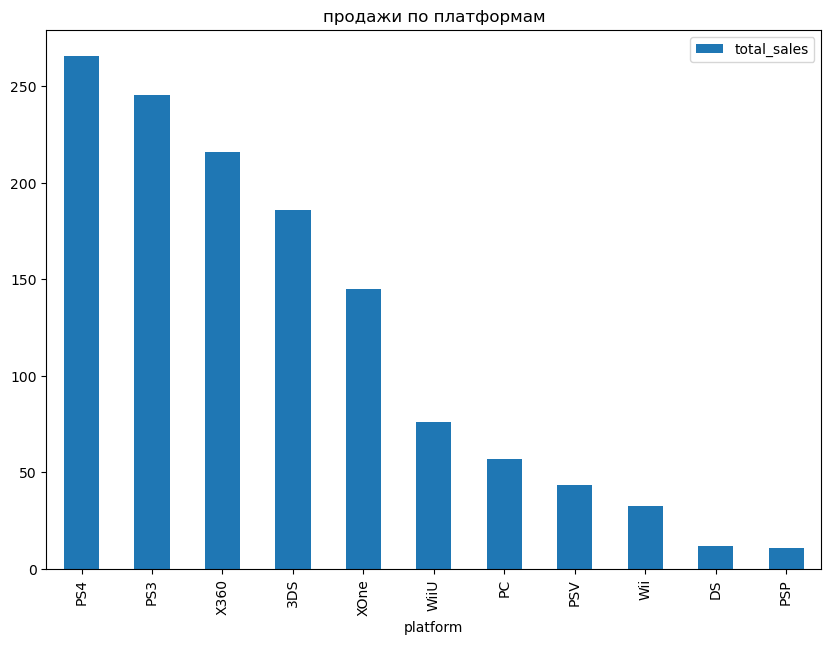

In [25]:
platforms_sales = data_last_years.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms_sales.plot(kind='bar', figsize=(10, 7))
plt.title('продажи по платформам')
plt.show()


Зная, что жизнь платформ скоротечна, посмотрим как развиваются продажи на этих платформах за последние годы

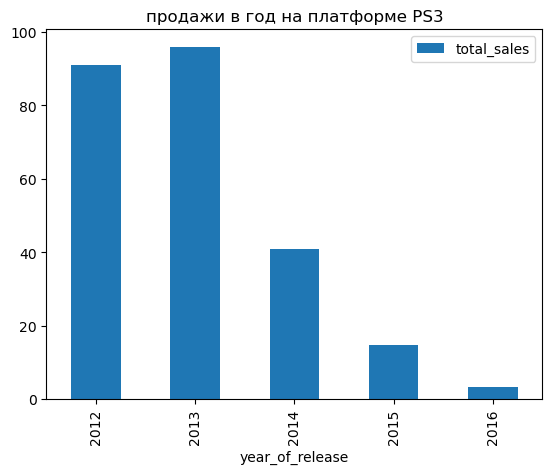

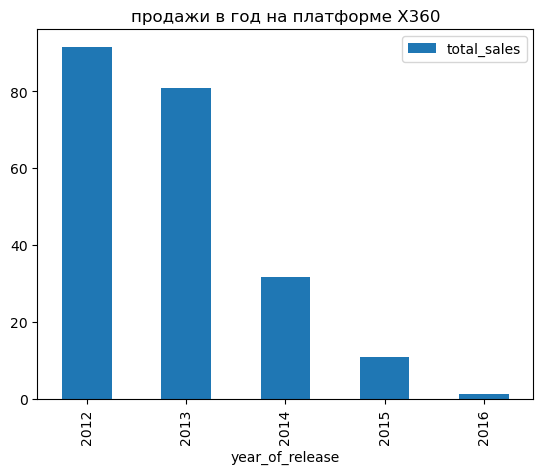

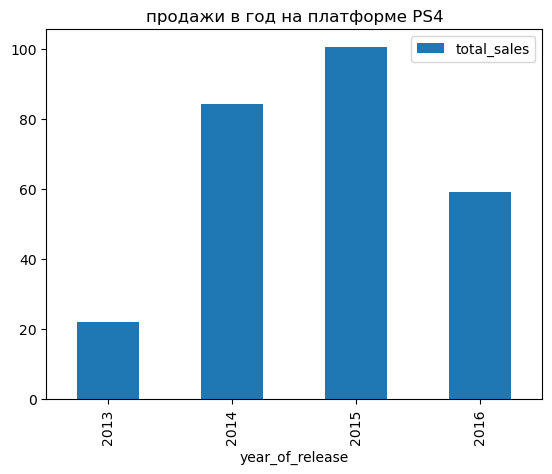

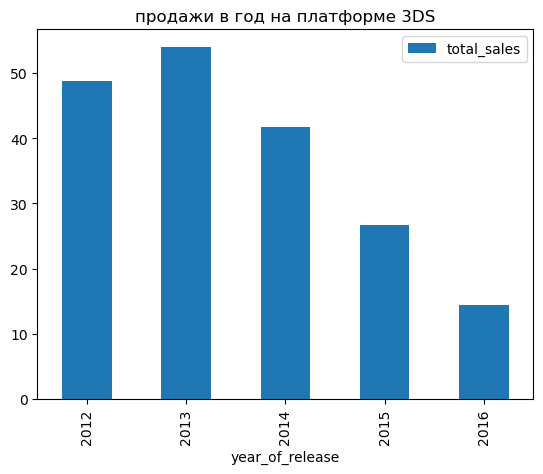

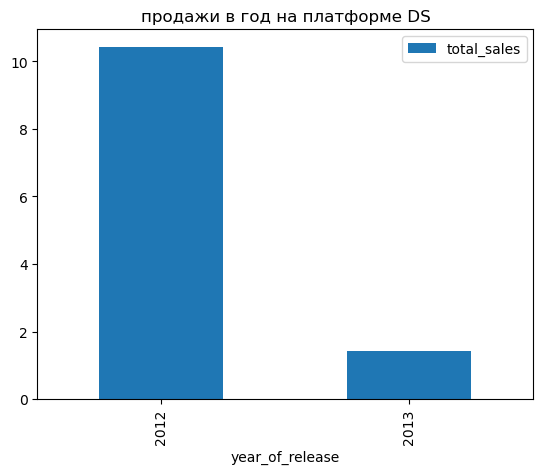

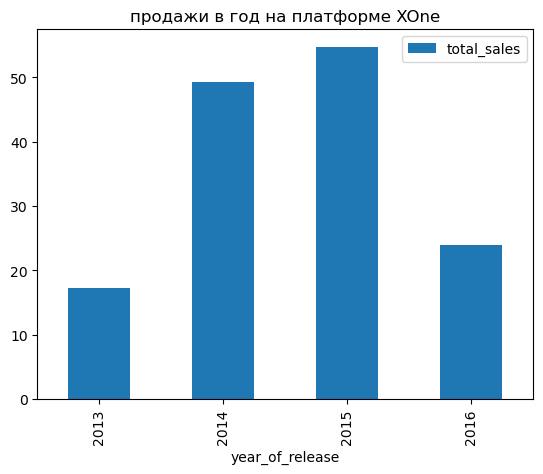

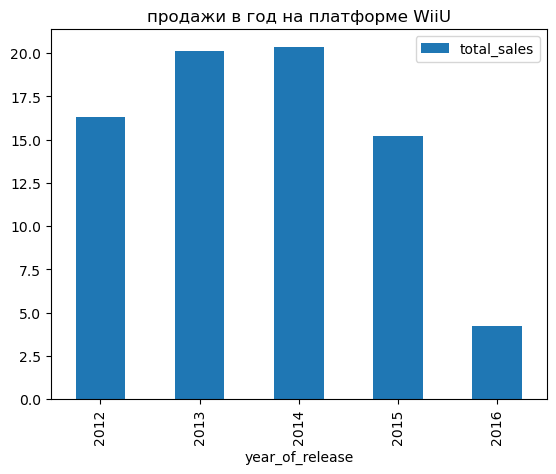

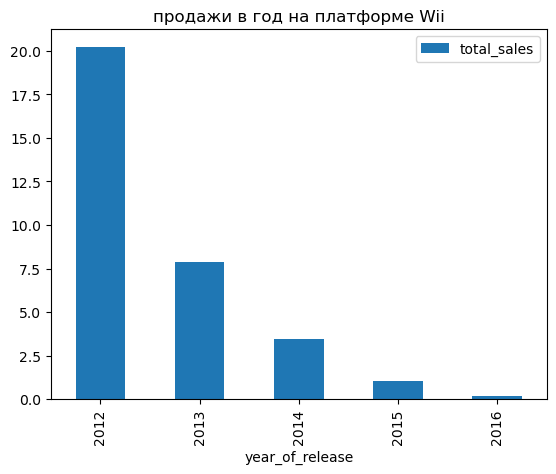

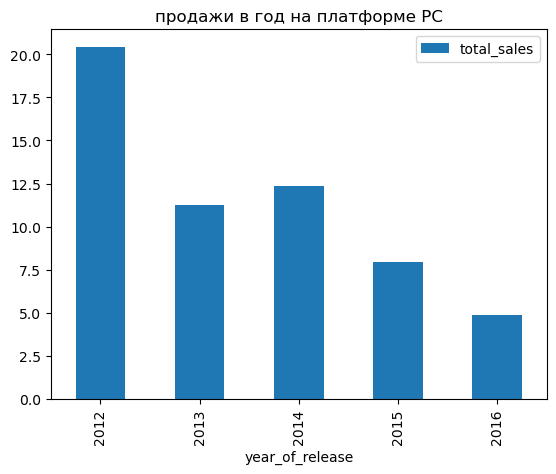

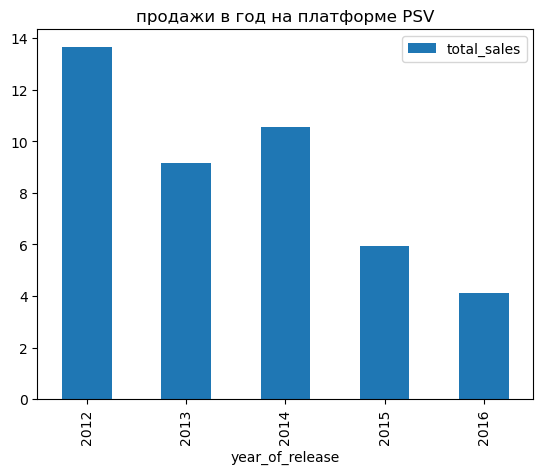

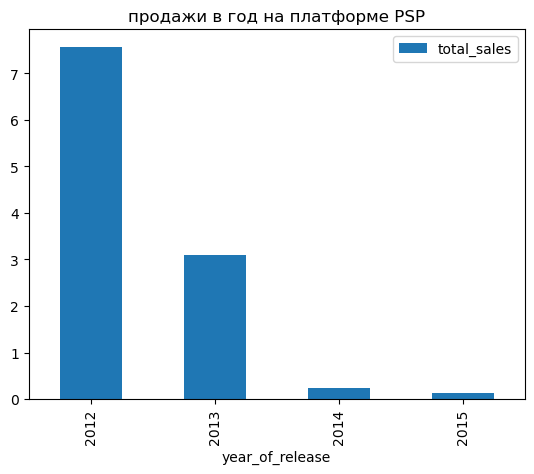

In [26]:
for platform in data_last_years['platform'].unique():
    platforms_sales_per_year = data_last_years[data_last_years['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
#    display(platforms_sales_per_year)
    platforms_sales_per_year.plot(kind='bar')
    plt.title(f'продажи в год на платформе {platform}')
    plt.show()

Учитывая, что данные за последний год могут быть неполными, выделим платформы, которые имеют перспективу роста. Это PS4, XOne, в меньшей степени WiiU. Продажи на остальных падают.

Посмотрим как распределены продажи игр на каждой платформе, для этого построим "ящики с усами". На каждой платформе есть бестселлеры-выбросы, ограничим графики так, чтобы выбросы не мешали

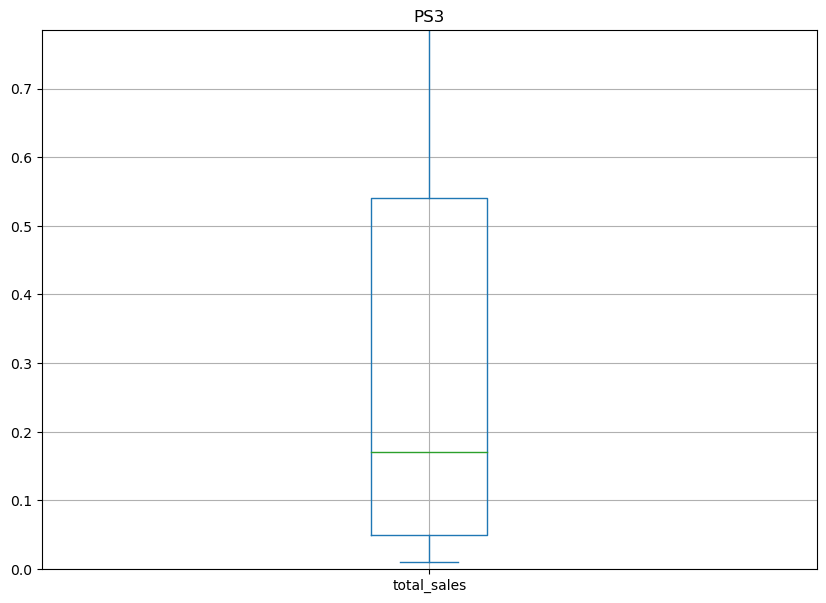

PS3 медиана = 0.17


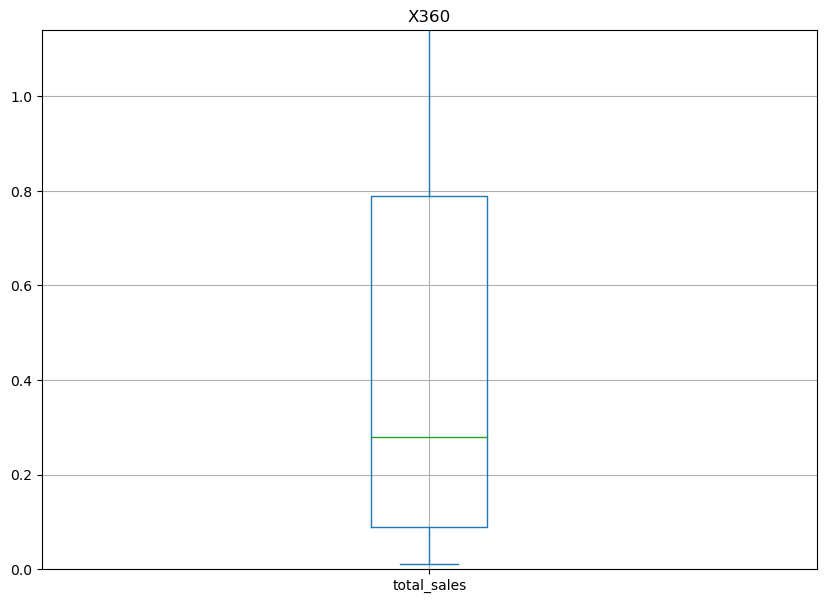

X360 медиана = 0.28


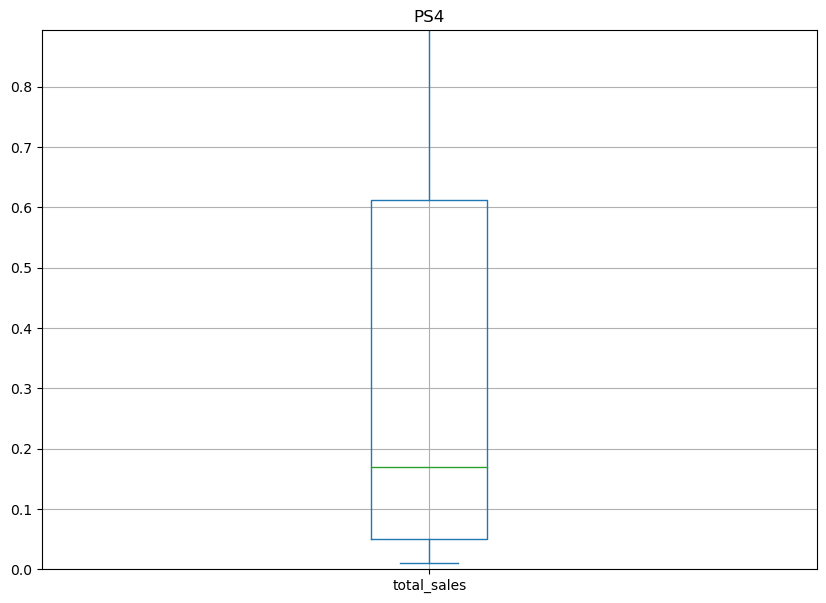

PS4 медиана = 0.17


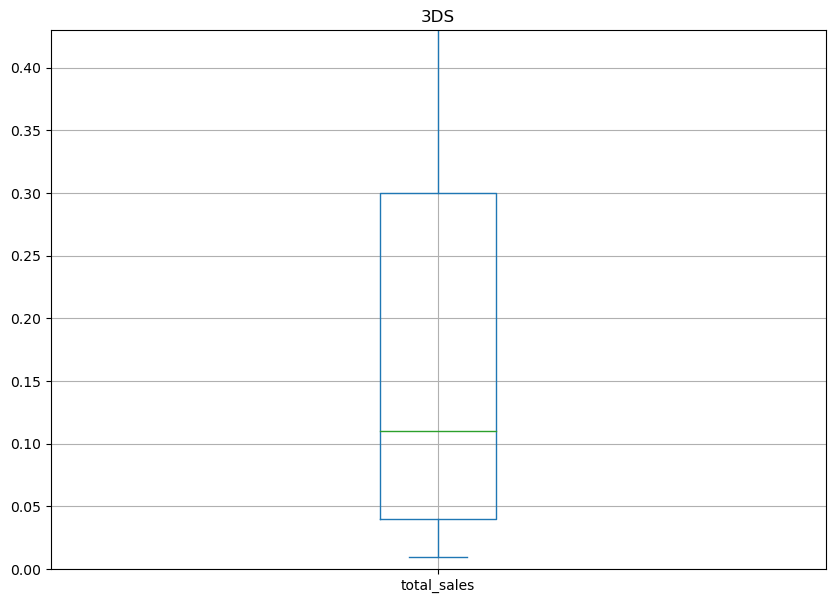

3DS медиана = 0.11


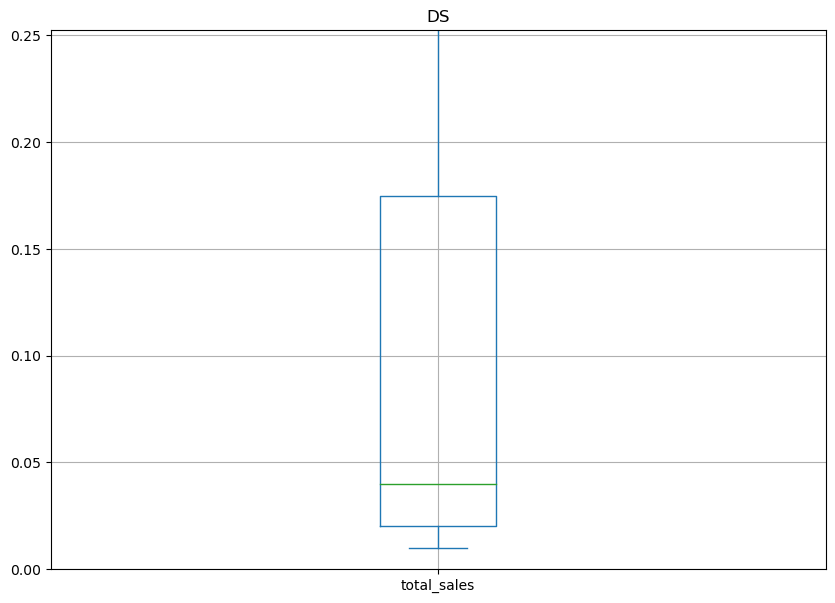

DS медиана = 0.04


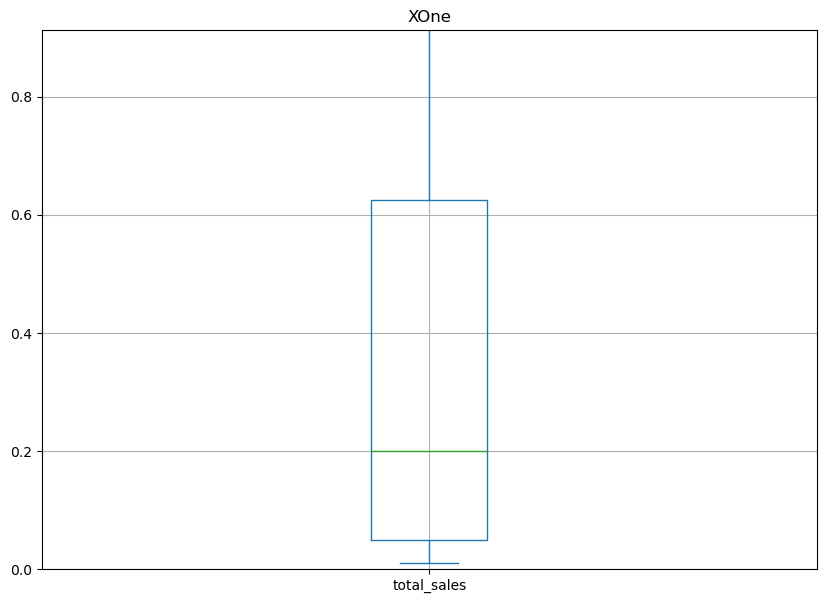

XOne медиана = 0.2


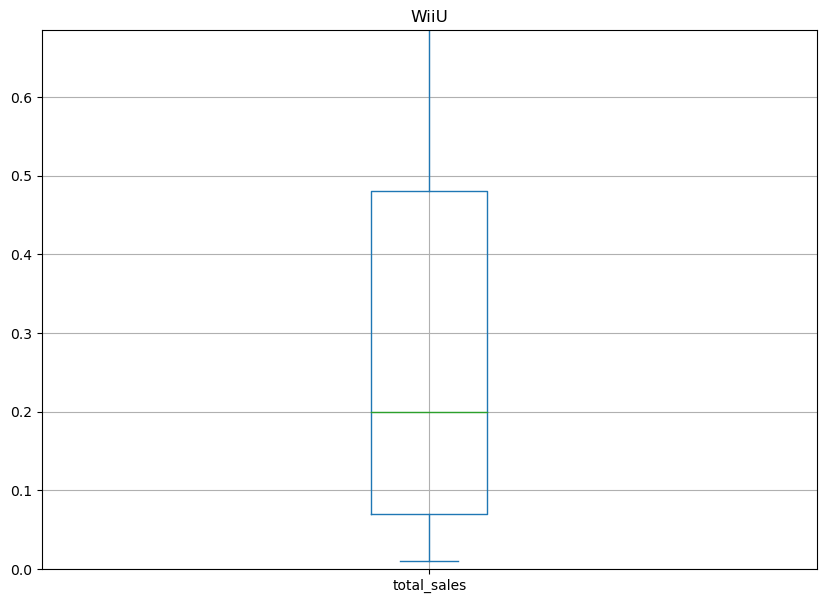

WiiU медиана = 0.2


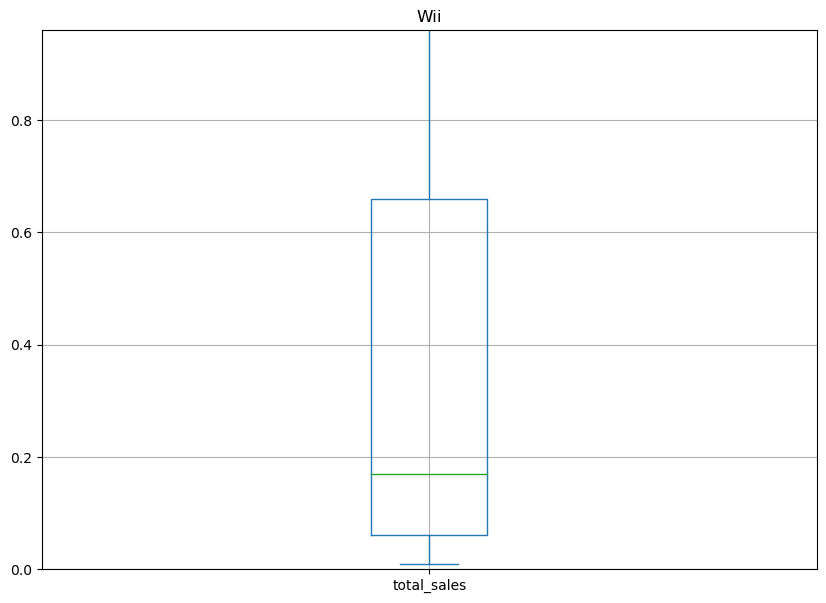

Wii медиана = 0.16999999999999998


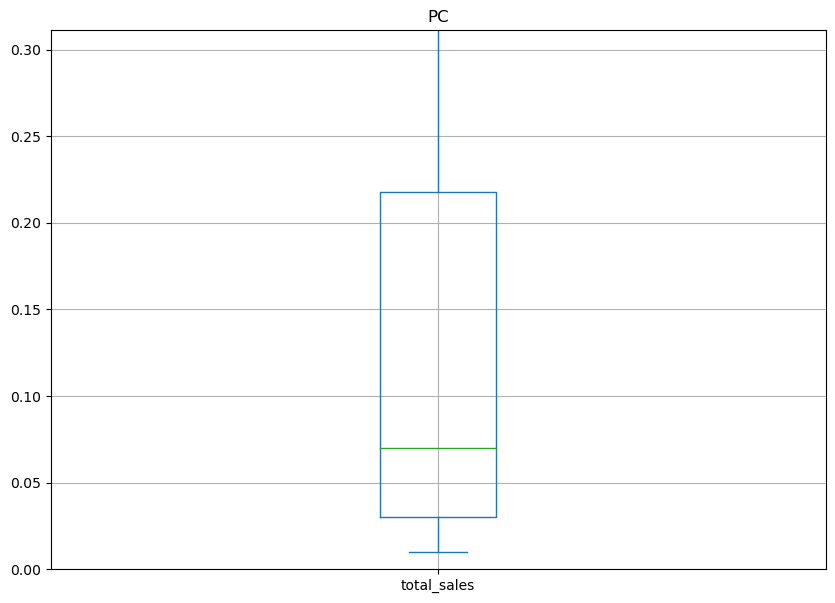

PC медиана = 0.07


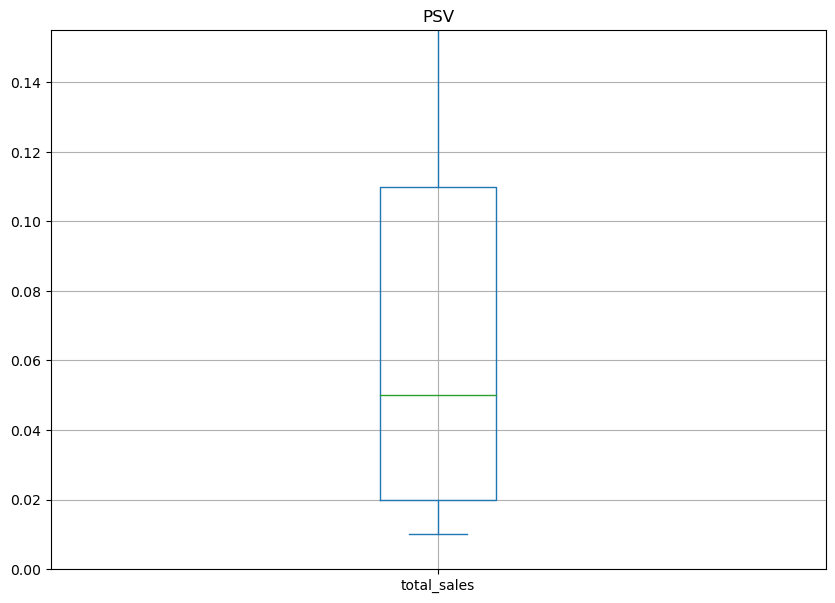

PSV медиана = 0.05


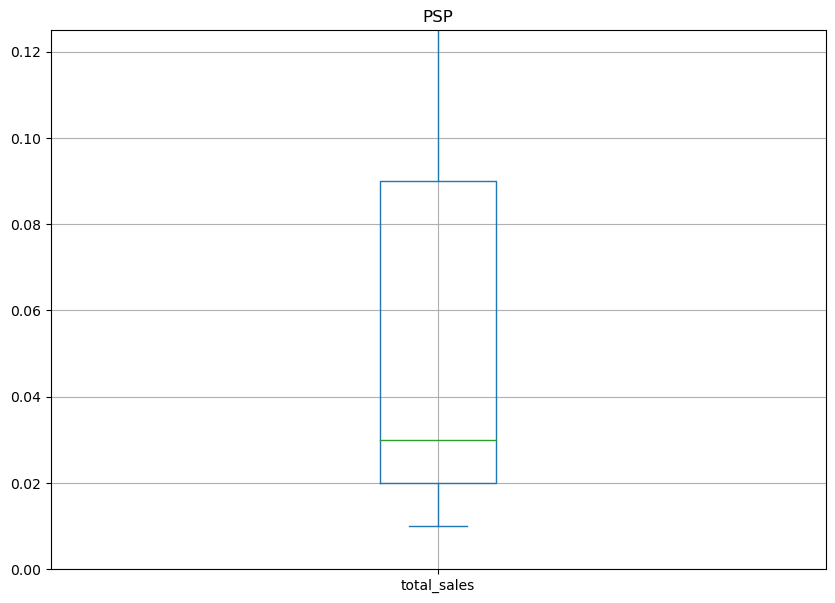

PSP медиана = 0.03


In [27]:
for platform in data_last_years['platform'].unique():
#    data_last_years[data_last_years['platform'] == platform].boxplot(column='total_sales', figsize=(10, 10))
    q_025 = data_last_years[data_last_years['platform'] == platform]['total_sales'].quantile(0.25) # первый квантиль
    q_075 = data_last_years[data_last_years['platform'] == platform]['total_sales'].quantile(0.75) # второй квантиль
    y_max = q_025 + 1.5 * (q_075 - q_025) # верхний ус

    data_last_years[data_last_years['platform'] == platform]['total_sales'].plot(kind='box', title=platform, figsize=(10, 7), ylim=(0, y_max), grid=True)
    plt.show()
    print(platform, 'медиана =', data_last_years[data_last_years['platform'] == platform]['total_sales'].median())

Посмотрим, как влияют отзывы критиков и пользователей на продажи игр на примере платформы PS4.

In [28]:
platform = 'PS4'

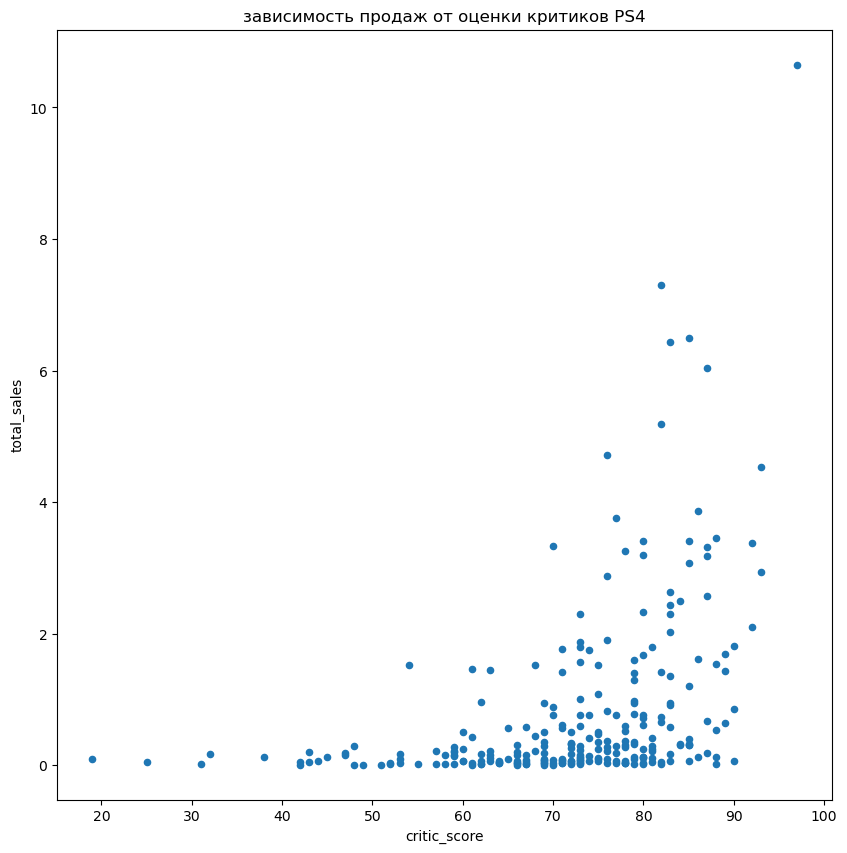

In [29]:
data[(data['platform'] == platform) & (data['critic_score'] > 0)].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 10))
plt.title(f'зависимость продаж от оценки критиков {platform}')
plt.show()

Игры с хорошими продажами обычно имеют хорошие оценки, а с плохими продажами никогда не имеют плохих оценок.
Оценка критика на продажи практически не влияет - игры с плохими продажами могут иметь любую оценку.

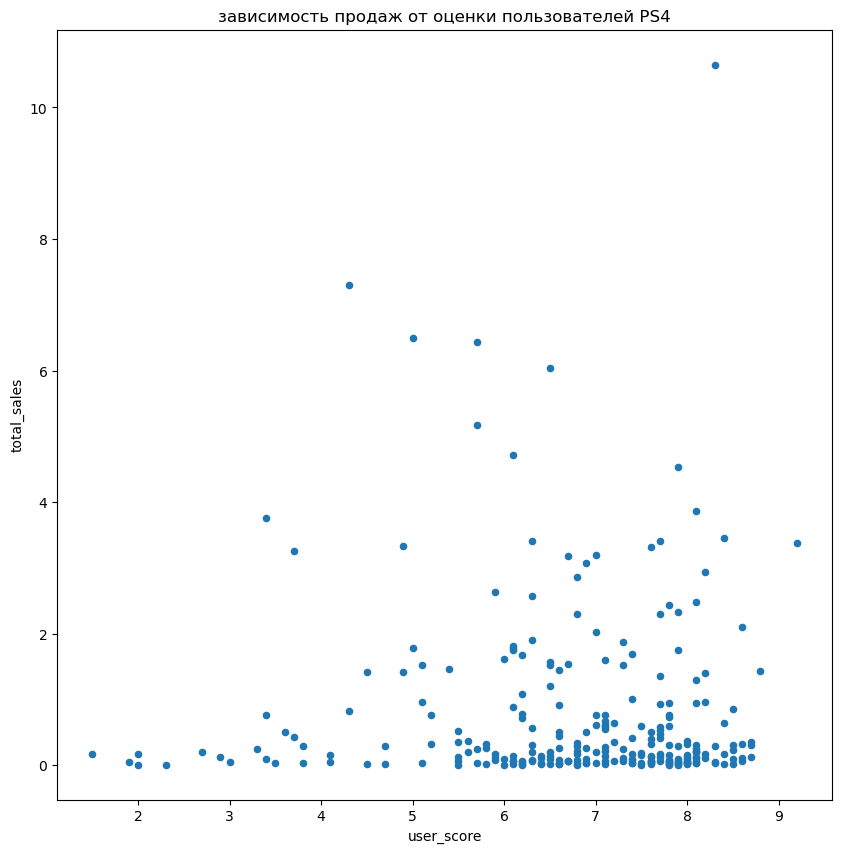

In [30]:
data[(data['platform'] == platform) & (data['user_score'] > 0)].plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 10))
plt.title(f'зависимость продаж от оценки пользователей {platform}')
plt.show()

Пользователи часто ставят низкие оценки играм, и при этом, те хорошо продаются, вероятно, это связано с хорошим продвижением игр. Пользователи больше подвержены рекламе, чем эксперты, и оценивают игру после покупки.
Игры с низкими продажами могут иметь любую оценку. Зависимость продаж от оценки пользователей еще ниже, чем от оценки критиков, т.к. даже среди игр с высокими продажами не видно зависимости.

Посчитаем корреляцию между отзывами и продажами, и заодно корреляцию между оценками критиков и пользователей.

In [31]:
print(f'Коэффициенты корреляции для платформы {platform}:')
print('  между продажами и отзывами критиков', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['critic_score'])
     )
print('  между продажами и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['user_score'])
     )
print('  между отзывами критиков и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & 
    (data['user_score'] > 0)]['critic_score'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & (data['user_score'] > 0)]['user_score'])
     )

Коэффициенты корреляции для платформы PS4:
  между продажами и отзывами критиков 0.40588677465201267
  между продажами и отзывами пользователей -0.03126053686666918
  между отзывами критиков и отзывами пользователей 0.5576539782764632


как мы видим, продажи почти не зависят от отзывов пользователей, продажи имеют умеренную прямую зависимсоть от отзывов критиков, отзывы критиков и отзывы пользователей имеют умеренную прямую зависимость друг от друга.

Возьмем платформу абсолютного лидера из предыдущего периода PS2 и платформу долгожителя PC - посчитаем коэффициенты для них. Возьмем для этого большую таблицу data.

In [32]:
platform = 'PS2'

In [33]:
print(f'Коэффициенты корреляции для платформы {platform}:')
print('  между продажами и отзывами критиков', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['critic_score'])
     )
print('  между продажами и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['user_score'])
     )
print('  между отзывами критиков и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & 
    (data['user_score'] > 0)]['critic_score'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & (data['user_score'] > 0)]['user_score'])
     )

Коэффициенты корреляции для платформы PS2:
  между продажами и отзывами критиков 0.405214981686603
  между продажами и отзывами пользователей 0.18778193292437517
  между отзывами критиков и отзывами пользователей 0.5658412443809724


In [34]:
platform = 'PC'

In [35]:
print(f'Коэффициенты корреляции для платформы {platform}:')
print('  между продажами и отзывами критиков', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0)]['critic_score'])
     )
print('  между продажами и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['total_sales'].corr(data[(data['platform'] == 
    platform) & (data['user_score'] > 0)]['user_score'])
     )
print('  между отзывами критиков и отзывами пользователей', data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & 
    (data['user_score'] > 0)]['critic_score'].corr(data[(data['platform'] == 
    platform) & (data['critic_score'] > 0) & (data['user_score'] > 0)]['user_score'])
     )

Коэффициенты корреляции для платформы PC:
  между продажами и отзывами критиков 0.2510957366153111
  между продажами и отзывами пользователей 0.016791366485853023
  между отзывами критиков и отзывами пользователей 0.5551985871878916


цифры получаются другие, но принципиальный смысл не меняется - зависимость продаж от отзывов критиков низкая ближе к умеренной, от отзывов пользователей - низкая.

Посмотрим, какие жанры пользуются популярностью и хорошо продаются

,count,sum
,total_sales,total_sales
genre,,
Action,1031,389.98
Adventure,302,26.62
Fighting,109,40.02
Misc,192,77.37
Platform,85,55.42
Puzzle,28,4.67
Racing,115,47.01
Role-Playing,370,177.97


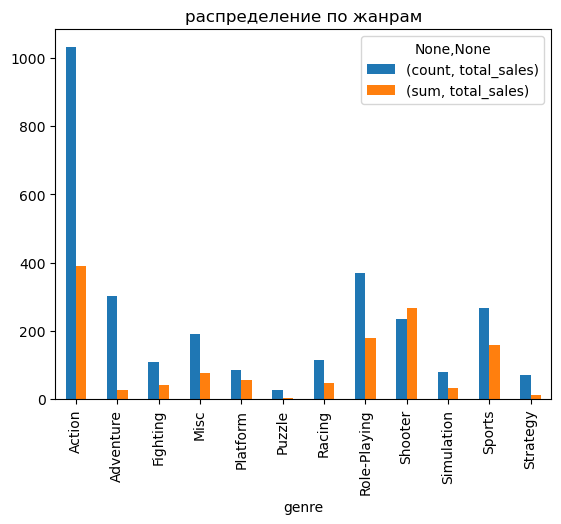

In [36]:
data_by_genre = data_last_years.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
display(data_by_genre)
data_by_genre.plot(kind='bar')
plt.title('распределение по жанрам')
plt.show()

Первое место и по количеству игр и по продажам у жанра Action. А вот жанр Shooter интересен тем, что занимает второе место по продажам, а вот по количеству выпущенных игр стоит только на пятом месте. В среднем, игры этого жанра более прибыльные, чем все другие.

Посмотрим как распределяются продажи внутри жанров, построим ящики с усами без выбросов

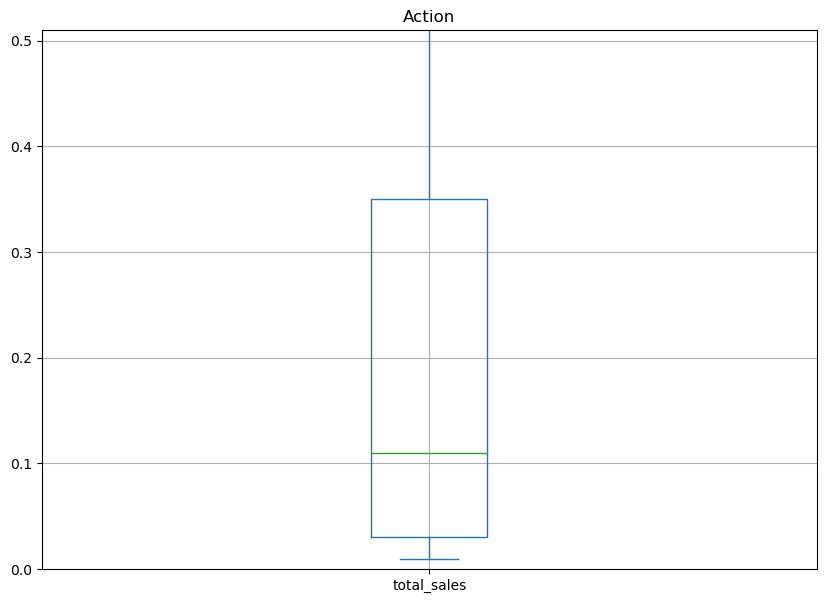

Action медиана = 0.11


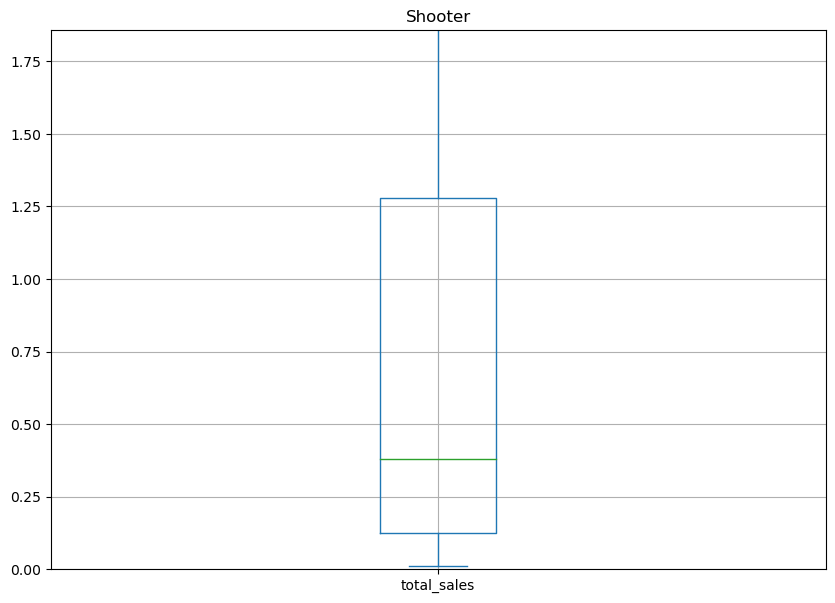

Shooter медиана = 0.38


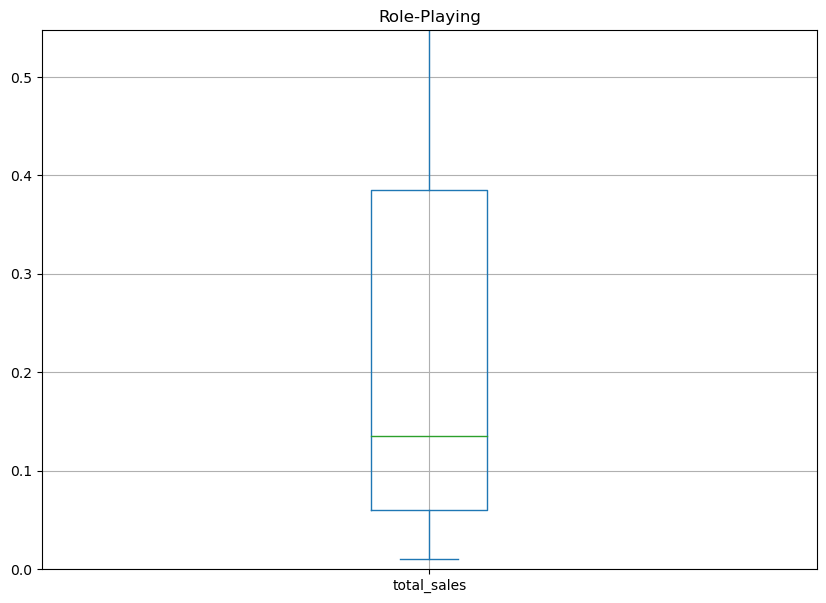

Role-Playing медиана = 0.135


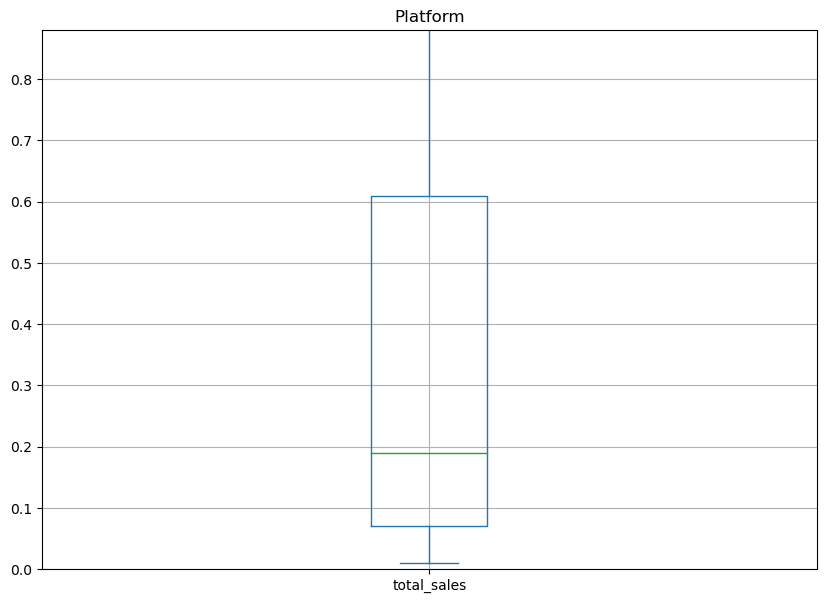

Platform медиана = 0.19


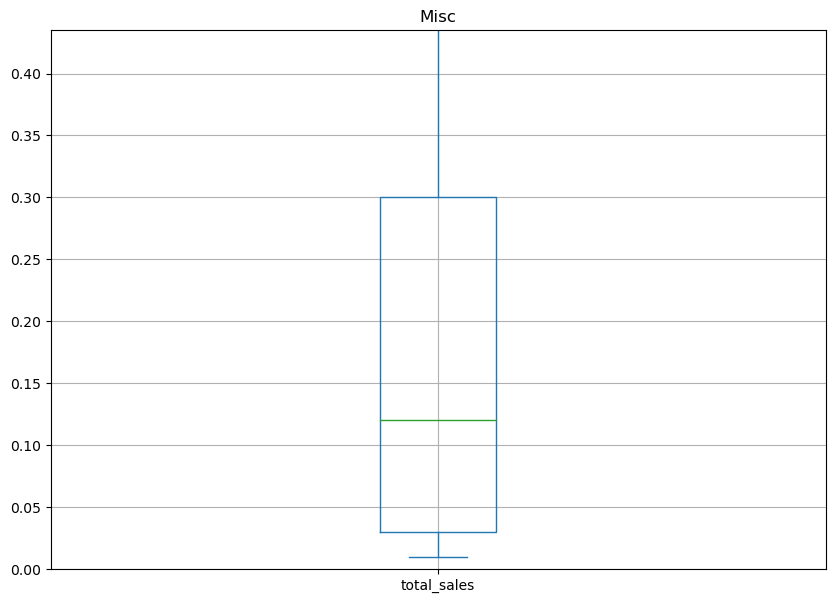

Misc медиана = 0.12


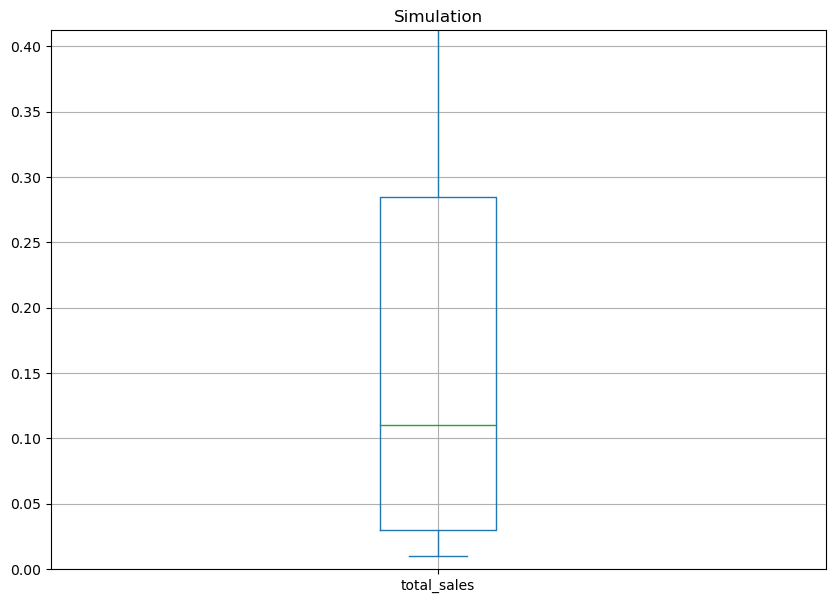

Simulation медиана = 0.11


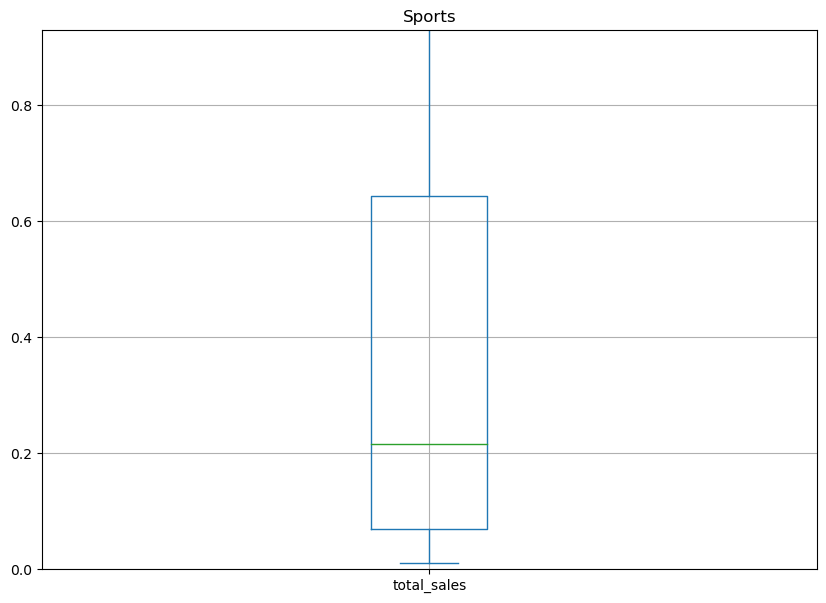

Sports медиана = 0.21500000000000002


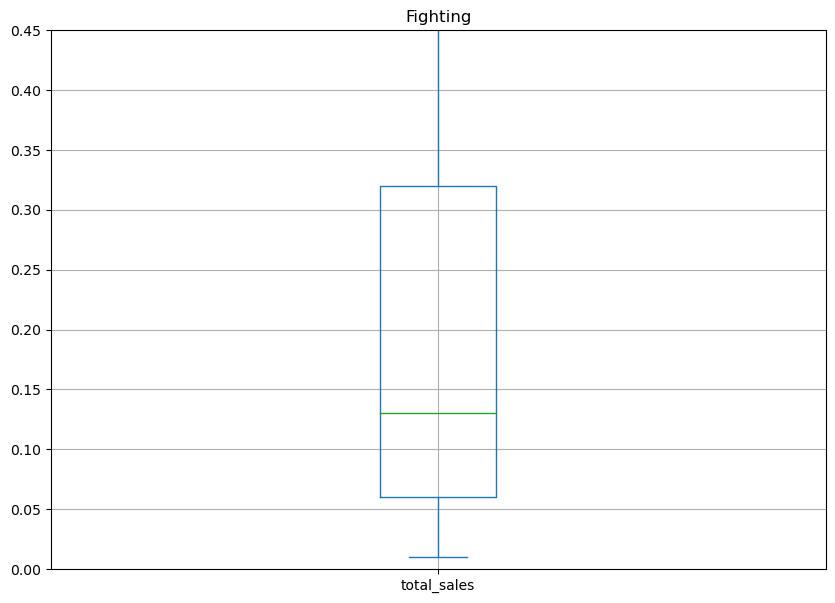

Fighting медиана = 0.13


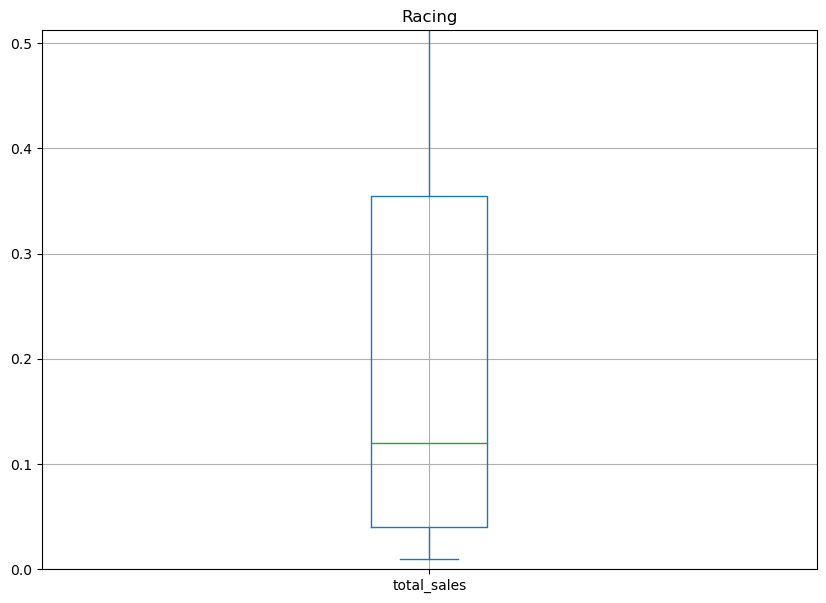

Racing медиана = 0.12


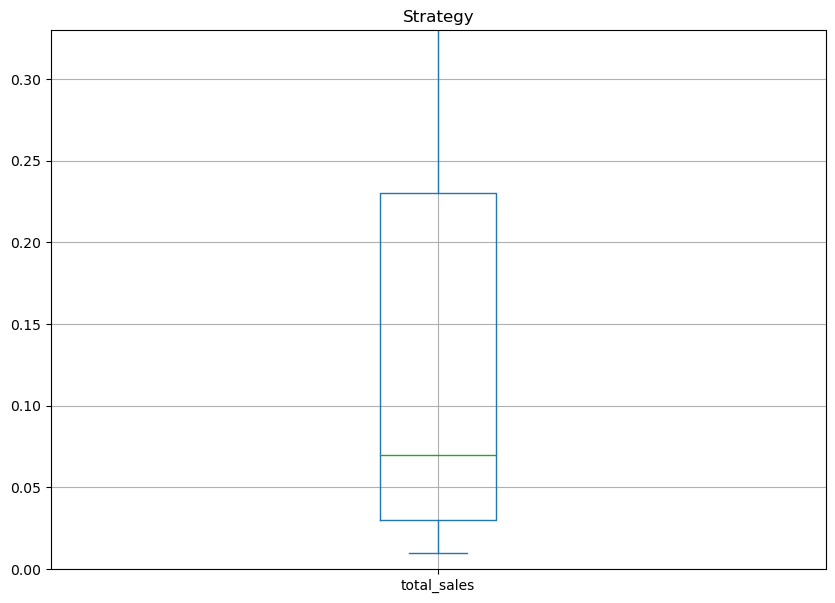

Strategy медиана = 0.07


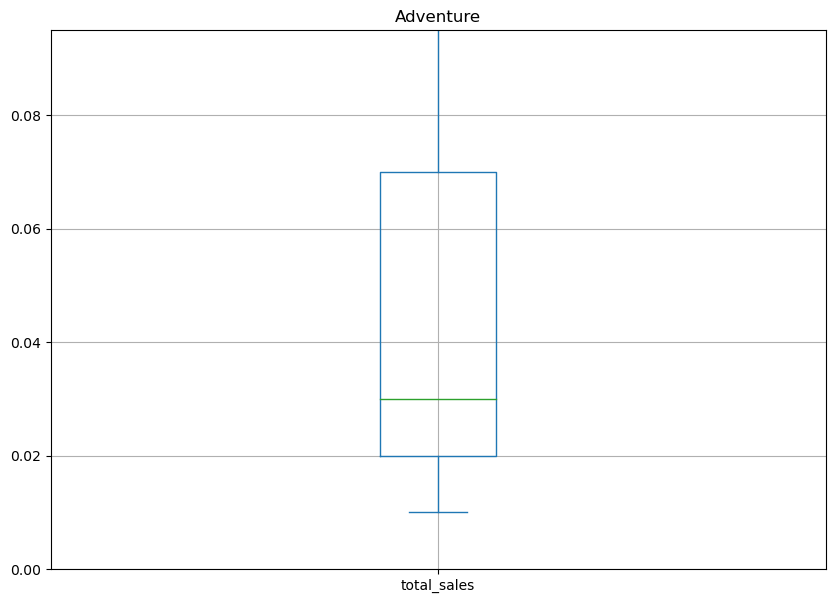

Adventure медиана = 0.03


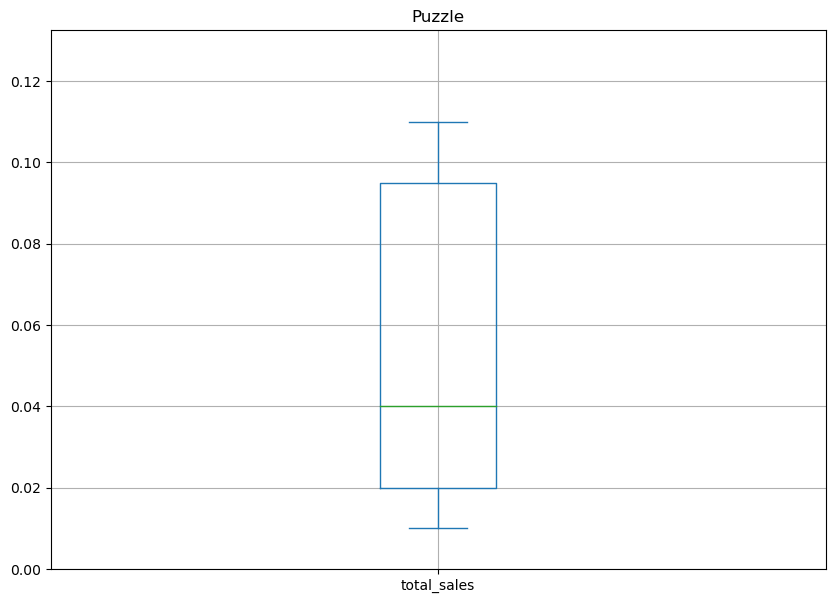

Puzzle медиана = 0.04


In [37]:
for genre in data_last_years['genre'].unique():
    q_025 = data_last_years[data_last_years['genre'] == genre]['total_sales'].quantile(0.25) # первый квантиль
    q_075 = data_last_years[data_last_years['genre'] == genre]['total_sales'].quantile(0.75) # второй квантиль
    y_max = q_025 + 1.5 * (q_075 - q_025) # верхний ус

    data_last_years[data_last_years['genre'] == genre]['total_sales'].plot(kind='box', title=genre, figsize=(10, 7), ylim=(0, y_max), grid=True)
    plt.show()
    print(genre, 'медиана =', data_last_years[data_last_years['genre'] == genre]['total_sales'].median())

В жанрах Shooter, Platform, Sports доля успешных игр выше, чем в других жанрах. Жанр Shooter опережает Platform и Sports и в абсолютных значениях и в относительных.

# Анализ поведения пользователей по регионам

Выберем ТОП-5 популярных платформ для каждого региона и посмотрим есть ли существенные различия

In [38]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

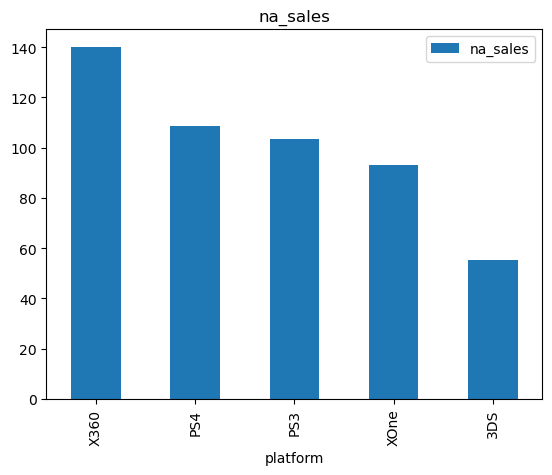

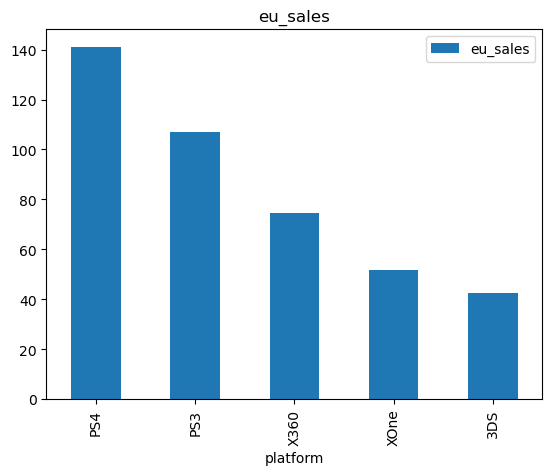

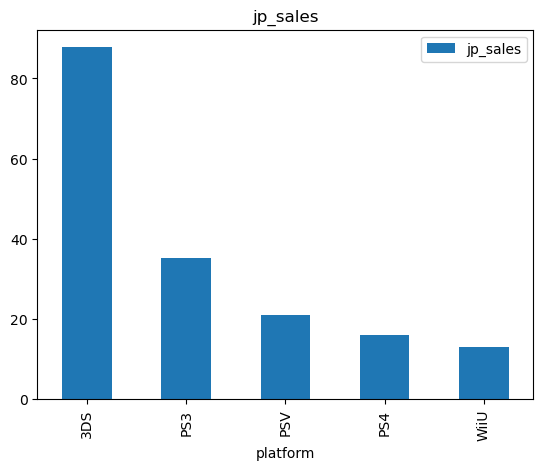

In [39]:
for region in regions:
    data_of_region = data_last_years.pivot_table(index='platform', values=region, aggfunc='sum')
    data_of_region = data_of_region.sort_values(by=region, ascending=False)[:5]
#    display(data_of_region)
    data_of_region.plot(kind='bar')
    plt.title(region)
    plt.show()

Популярность платформ в регионах различна - пятерка популярных платформ в Америке и Европе одинакова, лишь первая тройка имеет разную очередность. А вот в Японии и состав первой пятерки другой и первое место с большим отрывом занимает платформа, которая в остальных регионах на пятом месте. Несмотря на глобальность рынка игр, языковые и культурные различия следует принимать во внимание.

Посмотрим как распределились продажи по жанрам, есть предположение, что различия тоже будут существенные

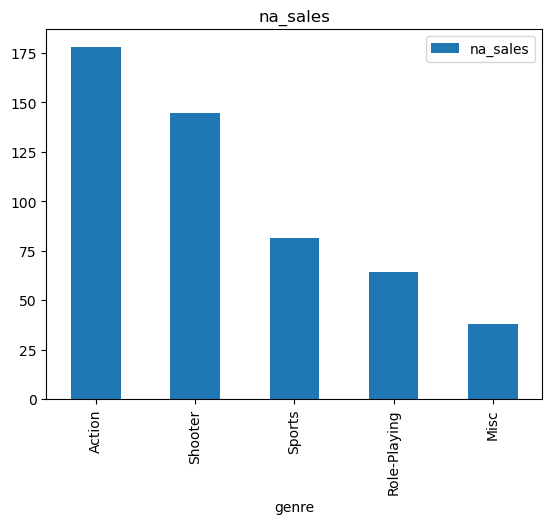

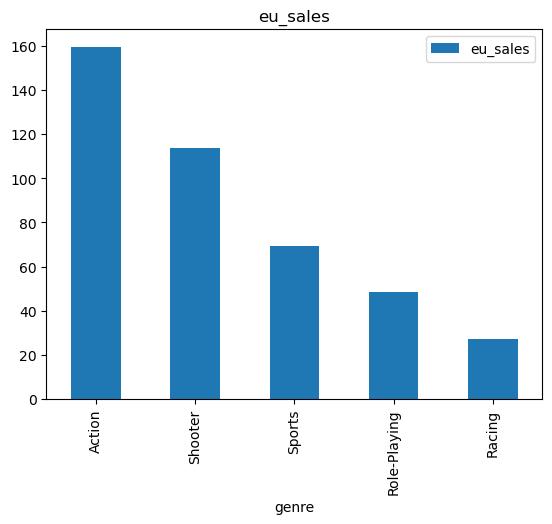

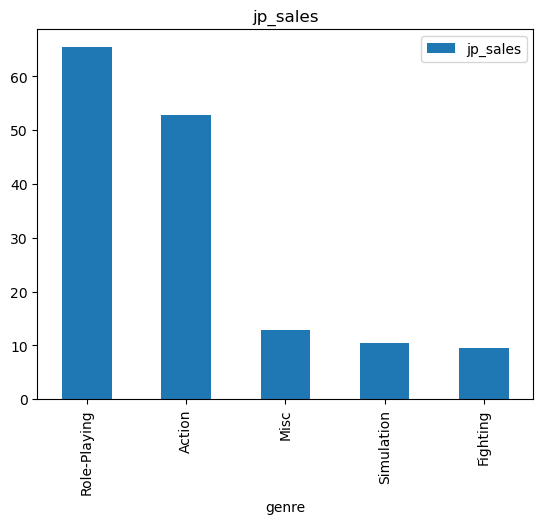

In [40]:
for region in regions:
    data_of_region = data_last_years.pivot_table(index='genre', values=region, aggfunc='sum')
    data_of_region = data_of_region.sort_values(by=region, ascending=False)[:5]
#    display(data_of_region)
    data_of_region.plot(kind='bar')
    plt.title(region)
    plt.show()

Популярность жанров, как и в случае с платформами различна. В Америке и Европе различия незначительны, первая четверка одинакова и распределена очень похоже - нет большого отрыва лидеров. На Японском рынке распределение жанров совершенно другое - и состав пятерки другой и есть два лидерующих жанра - Role-Playing и Action

Рынок игр в Америке и Европе более диверсифицирован, чем японский рынок как по платформам, так и по жанрам.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,count,sum
,na_sales,na_sales
rating,,
E,395,114.37
E10+,306,75.70
M,498,231.57
NN,1275,103.31
T,412,66.02


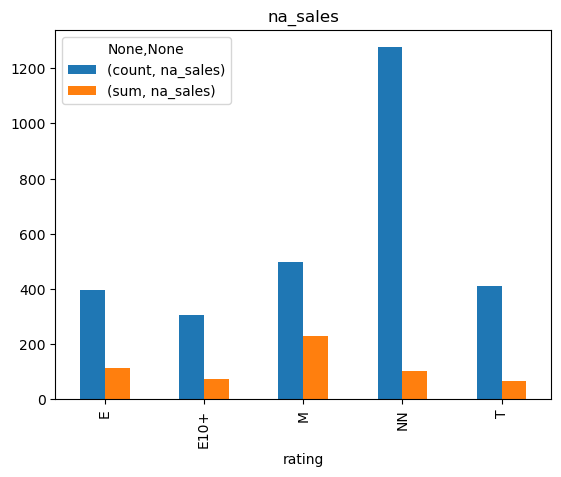

,count,sum
,eu_sales,eu_sales
rating,,
E,395,113.03
E10+,306,55.37
M,498,193.96
NN,1275,91.50
T,412,52.96


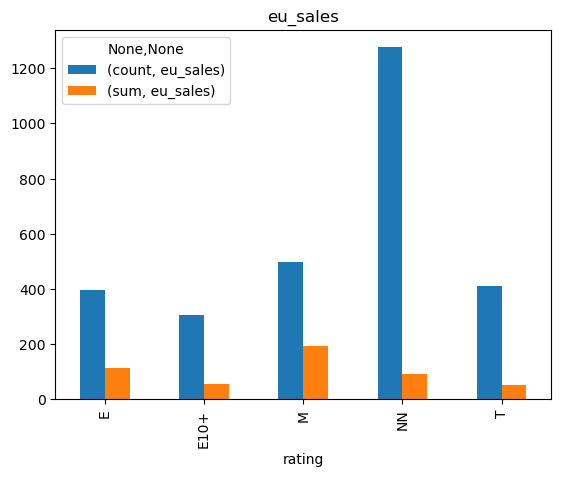

,count,sum
,jp_sales,jp_sales
rating,,
E,395,28.33
E10+,306,8.19
M,498,21.20
NN,1275,108.84
T,412,26.02


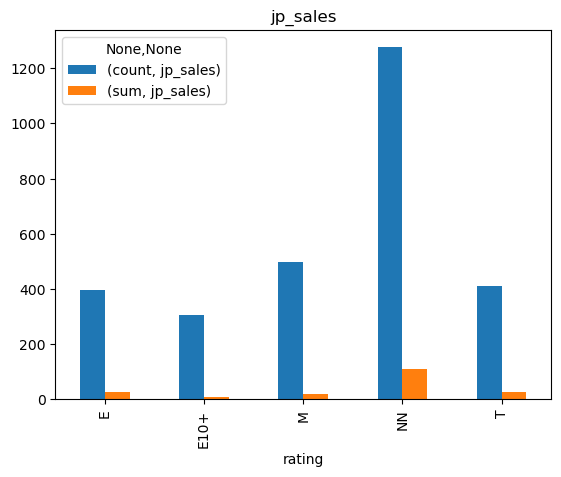

In [41]:
for region in regions:
    data_na_by_ratings = data_last_years.pivot_table(index='rating', values=region, aggfunc=['count', 'sum'])
    display(data_na_by_ratings)
    data_na_by_ratings.plot(kind='bar')
    plt.title(region)
    plt.show()


Мы не знаем причину большого количества пропусков в данных, и как распределены рейтинги среди пропусков - нормально или относятся к одной группе, например, E

Для Америки и Европы мы можем сделать вывод, что рейтинг М имеет максимальные продажи как в абсолютном значении, так и относительно к количеству выпущенных игр. Количество игр с неуказанным рейтингом большое, но их продажи не такие высокие, если пропуски в жанрах распределены нормально или близко к нормальному, то мы видим актуальные распредедения по рейтингам. Если распределение не является нормальным, то лидерство рейтинга M может изменится только если все пропуски являются рейтингом E

Для Японии мы такой вывод сделать не можем, т.к. продажи игр с неуказанным рейтингом имеют максимальную долю в продажах, много зависит от того, как реально распределены значения внутри этой группы. Рейтинги E, M, T имеют значения очень близкие, E10+ самая немногочисленная группа как по количеству игр, так и по продажам, но если среди пропусков большая часть из этой группы, она может стать лидером.

Возрастной рейтинг вероятно коррелирует с жанром игры. На японском рынке два жанра имеют большой отрыв от остальных. Можно посмотреть как распреденены возрастные рейтинги в этих жанрах, и как распределены пропуски по жанрам. Возможно, получится сделать вывод, как распределены пропуски по рейтингам.

# Проверка гипотез

Будем считать совокупности данных независимыми с одинаковым распределением

Проверка  гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [42]:
print('Нулевая гипотеза: средние пользовательские оценки на платформах Xone и PC равны')
print('Альтернативная гипотеза: средние пользовательские оценки на платформах Xone и PC разные')
alpha = 0.05
print(f'коэффициент статистической значимости установлен {alpha}')
results = st.ttest_ind(data_last_years[data_last_years['platform'] == 'XOne']['user_score'], \
                       data_last_years[data_last_years['platform'] == 'PC']['user_score'], \
                       equal_var=True
                      )
print(results.pvalue)
if results.pvalue < alpha:
    print('нулевую гипотезу отвергаем')
else:
    print('нулевую гипотезу отвергнуть не получилось')

Нулевая гипотеза: средние пользовательские оценки на платформах Xone и PC равны
Альтернативная гипотеза: средние пользовательские оценки на платформах Xone и PC разные
коэффициент статистической значимости установлен 0.05
0.0679776646270018
нулевую гипотезу отвергнуть не получилось


Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

In [43]:
print('Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны')
print('Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные')
alpha = 0.01
print(f'коэффициент статистической значимости установлен {alpha}')
results = st.ttest_ind(data_last_years[data_last_years['genre'] == 'Action']['user_score'], \
                       data_last_years[data_last_years['genre'] == 'Sports']['user_score'], \
                       equal_var=True
                      )
print(results.pvalue)
if results.pvalue < alpha:
    print('нулевую гипотезу отвергаем')
else:
    print('нулевую гипотезу отвергнуть не получилось')

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные
коэффициент статистической значимости установлен 0.01
0.030525082904009942
нулевую гипотезу отвергнуть не получилось


То, как пользователи оценивают игры, не зависит от выбора платформы, но зависит от жанра игры - пользователи, предпочитающие одни жанры, более требовательны, чем любители других жанров.

# Вывод

Мы рассмотрели как влияют доступные метрики на продажи игр. В процессе анализа были сделаны некотрые промежуточные выводы, теперь подведем итоги.

Регионы в порядке значимости расположились следующим образом: Северная Америка, Европа, Япония. Вероятно, что максимальные продажи в следующем году в Америке и Европе будут на платформах PS4 и XOne в жанрах Action, Shooter, Sports, Role-Playing с возрастными рейтингами M (для взрослых) и E (для всех). Японский рынок менее предсказуемый, кроме платформ PS4 и XOne могут быть успешными платформы PSV и WiiU. Главные жанры на японском рынке Role-Playing и Action, зависимось от возрастного рейтинга невыраженная. В процессе принятия решений не следует доверять оценкам пользователей, можно обращаться к оценкам критиков, только в формате: если оценка низкая, то не стоит ждать высоких продаж.

In [44]:
print('год / игр с пропусками / доля таких игр')
for year in sorted(data['year_of_release'].unique()):
    games_with_nan = len(data[(data['critic_score'] == 0) & (data['user_score'] == 0) & (data['rating'] == 'NN') & (data['year_of_release'] == year)])
    games_total = len(data[data['year_of_release'] == year])
    print(year, games_with_nan, round(games_with_nan / games_total, 2), sep='         ')

год / игр с пропусками / доля таких игр
1980         9         1.0
1981         46         1.0
1982         36         1.0
1983         17         1.0
1984         14         1.0
1985         13         0.93
1986         21         1.0
1987         16         1.0
1988         14         0.93
1989         17         1.0
1990         16         1.0
1991         41         1.0
1992         41         0.95
1993         60         1.0
1994         120         0.99
1995         219         1.0
1996         255         0.97
1997         268         0.93
1998         346         0.91
1999         296         0.88
2000         200         0.57
2001         143         0.3
2002         174         0.21
2003         161         0.21
2004         161         0.21
2005         232         0.25
2006         327         0.33
2007         375         0.31
2008         440         0.31
2009         408         0.29
2010         453         0.36
2011         419         0.37
2012         290         0.4

Информация для дата-инженера: за посдедние годы качество информации значительно хуже, чем в начале 2000-х, это очень странно, количество выпускаемых игр меньше, требования к анализу выше, требуется проверить корректность выгрузки данных.